In [2]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [ ]:
# Cell: robust data load + preview
candidates = [
    Path("../data/13_employee_productivity.csv"),
    Path.cwd() / "students" / "03" / "data" / "13_employee_productivity.csv",
]
data_path = next((p for p in candidates if p.exists()), None)
if data_path is None:
    raise FileNotFoundError(f"Dataset not found. Tried: {candidates}")
employee_productivity_df = pd.read_csv(data_path)
required_cols = {'years_experience', 'productivity'}
if not required_cols.issubset(employee_productivity_df.columns):
    raise ValueError(
        f"Missing columns: {required_cols - set(employee_productivity_df.columns)}")
print("Head:\n", employee_productivity_df.head())

Head:
    years_experience  productivity
0               0.0            55
1               1.0            62
2               2.0            68
3               3.0            74
4               4.0            80


Slope: 4.7739, Intercept: 58.8693
R²: 0.9784
p-value: 1.9069e-16
Standard error: 0.1671
Interpretation: On average productivity changes by 4.77 units per year of experience.


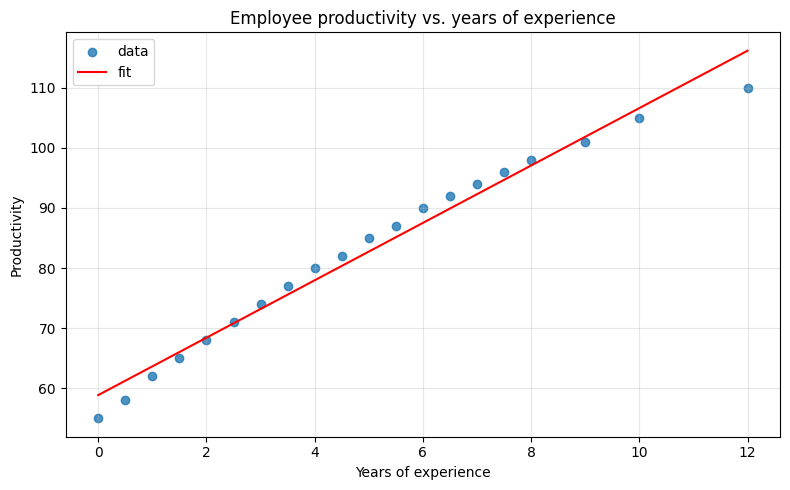

In [4]:
# Cell: regression, metrics, interpretation, plotting (vectorized)
x = employee_productivity_df['years_experience']
y = employee_productivity_df['productivity']

slope, intercept, r, p, std_err = stats.linregress(x, y)

# Metrics + interpretation
print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}")
print(f"R²: {r**2:.4f}")
print(f"p-value: {p:.4e}")
print(f"Standard error: {std_err:.4f}")
print(
    f"Interpretation: On average productivity changes by {slope:.2f} units per year of experience.")

# Vectorized predictions and stable plotting
y_pred = slope * x + intercept

plt.figure(figsize=(8, 5))
plt.scatter(x, y, label="data", alpha=0.8)
# plot sorted line for correct line shape
xs = np.linspace(x.min(), x.max(), 100)
plt.plot(xs, slope*xs + intercept, color="red", label="fit")
plt.xlabel("Years of experience")
plt.ylabel("Productivity")
plt.title("Employee productivity vs. years of experience")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()